# Homework 1. Exploratory Data Analysis, (Prob 3)

Homework Based on Harvard CS109

All work should be your own.

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data

[Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 

#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting
* [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html), for stats

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. Download the ipython notebook, fill in and submit in blackboard.

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [2]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here
def ratioNormals(diff, a):
    #stats.norm(loc=mean, scale=std)
    X = stats.norm(loc=diff, scale=1)
    Y = stats.norm(loc=0, scale=1)
    #norm.sf(a) = Q-function = Pr(norm > a)
    return X.sf(a) / Y.sf(a)

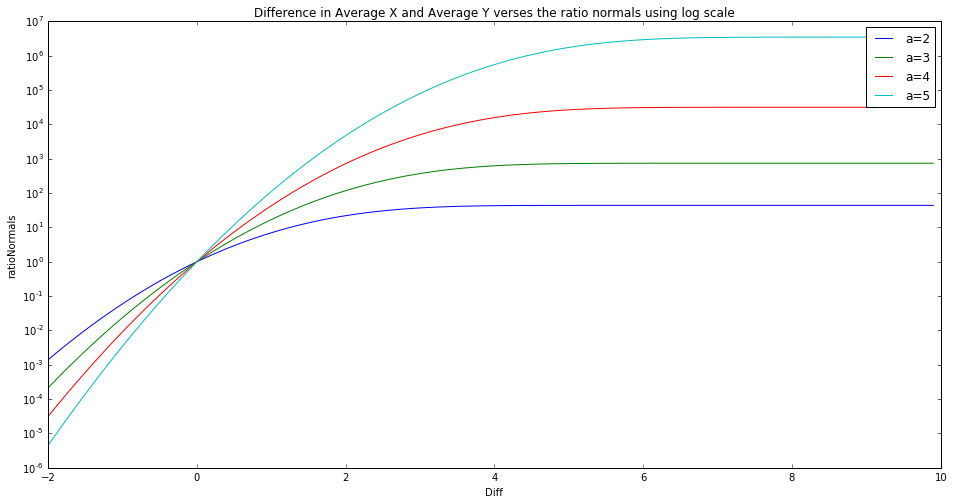

In [3]:
#your code here
#ratioNormals(1,2)
A = range(2,6)
ratioNorms = plt.figure(figsize=(16, 8), dpi=80)
for a in A:
    X = np.arange(-2,10,0.1)
    Y = [ratioNormals(x, a) for x in X]
    plt.plot(X,Y)
plt.legend(['a='+str(a) for a in A])
plt.title("Difference in Average X and Average Y verses the ratio normals using log scale")
plt.xlabel('Diff')
plt.ylabel('ratioNormals')
#plt.xlim([-10,10])
#plt.ylim([-1,7])
plt.yscale('log')
plt.show()

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? Use the year 2012. 

> Needed this from Problem 2:

In [4]:
countries_csv = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
countries = pd.read_csv(countries_csv)

income_xlsx = "https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xls"
income_transpose = pd.read_excel(income_xlsx).T
income_transpose.columns = income_transpose.iloc[0]

income_transpose = income_transpose[1:]
income_transpose = income_transpose.dropna(axis=1,how='any')

def mergeByYear(year):
    income_year = income_transpose[income_transpose.index==year]
    #ugly list comprehension
    merged = [{'Country':country, 'Region':region,
               'Income':income_year[income_year.filter(regex=country).columns[0]].values[0]}
              for index, country, region in countries.itertuples()
              if len(income_year.filter(regex=country).columns) > 0] 
    return pd.DataFrame(merged)

In [5]:
#your code here
ipp2012 = mergeByYear(2012)
ipp2012.head()

,Country,Income,Region
0,Algeria,12779.0,AFRICA
1,Angola,7230.0,AFRICA
2,Benin,1685.0,AFRICA
3,Botswana,14905.0,AFRICA
4,Burkina,1532.0,AFRICA


In [6]:
avgAsia = ipp2012[ipp2012.Region == "ASIA"].Income.mean()
avgSA = ipp2012[ipp2012.Region == "SOUTH AMERICA"].Income.mean()
print("South America\tAsia")
print("$%.2f\t$%.2f" % (avgSA,avgAsia))
if avgAsia > avgSA:
    print("Asia has higher average income than South America")
else:
    print("South America has higher average income than Asia")

South America	Asia
$13015.75	$23500.43
Asia has higher average income than South America


#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a). Use the year 2012. 

In [7]:
#your code here
[(region, len(ipp2012[(ipp2012.Region == region) & (ipp2012.Income > 10000)]) / len(ipp2012[ipp2012.Region == region]) *100)
    for region in ipp2012.Region.unique()]

[('AFRICA', 21.153846153846153),
 ('ASIA', 56.75675675675676),
 ('EUROPE', 86.04651162790698),
 ('NORTH AMERICA', 65.0),
 ('OCEANIA', 28.57142857142857),
 ('SOUTH AMERICA', 75.0)]

In [8]:
#print(ratioNormals(avgAsia-avgSA, 10000))

> Europe has the largest proportion of countries with income per person greater than 10k. The second highest is South America. Asia must have fallen short here because the incomes aren't as well distributed in Asia as it is in South America. Recall from problem 2 that South America had the tighest box plot and Asia had a box plot with a couple of outliers.

#### Problem 3(d)

Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [9]:
#your code here
population_xlsx="https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&output=xls"
population = pd.read_excel(population_xlsx)

population.head()

pop2012 = population[["Total population", 2012]].dropna(axis=0,how='any')
pop2012.columns = ["Country", "Population"]
pop2012.head()

,Country,Population
1,Afghanistan,29726803.0
3,Albania,2880667.0
4,Algeria,37439427.0
5,American Samoa,55227.0
6,Andorra,79316.0


In [10]:
ipp2012.head()

,Country,Income,Region
0,Algeria,12779.0,AFRICA
1,Angola,7230.0,AFRICA
2,Benin,1685.0,AFRICA
3,Botswana,14905.0,AFRICA
4,Burkina,1532.0,AFRICA


In [11]:
print("%-15s\t%s" % ("Region" ,"Average Income"))
print()
for region in ipp2012.Region.unique():
    incbypop = []
    ippRegion = ipp2012[ipp2012.Region == region]
    totalpops = sum([pop2012[pop2012.Country == country].Population.mean() for country in ippRegion.Country.unique()
                    if country in pop2012.Country.unique()])
    for country in ippRegion.Country.unique():
        pop = pop2012[pop2012.Country == country].Population.mean()
        inc = ippRegion[ippRegion.Country == country].Income.mean()
        if pop == pop:
            incbypop.append(pop*inc)
    print("%-15s\t$%.2f" % (region ,sum(incbypop)/totalpops))

Region         	Average Income

AFRICA         	$5276.94
ASIA           	$9724.72
EUROPE         	$31378.62
NORTH AMERICA  	$36459.52
OCEANIA        	$31312.28
SOUTH AMERICA  	$14564.84


> Asia has such low average income now :O  
The reason for this is that this time I multiplied the incomes by each countries population. The sum of that divided by the total population of the region gives a more realistic average which is not necessarily the same as the reported average of each region. South America didn't have much of a difference, which shows the income is evenly distributed.

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


> Because Asia has some crazy outliers, the average income in Asia based on the reported incomes of each country appears to be high. Once we take into account each country's population, Asia doesn't look so hot. Let's take a closer look.

In [12]:
topAsiaInc = ipp2012[(ipp2012.Region == "ASIA") & (ipp2012.Income >= avgAsia)]
lowAsiaInc = ipp2012[(ipp2012.Region == "ASIA") & (ipp2012.Income < avgAsia)]
print("Asian countries below mean income: %d\n"
      "Asian countries equal to and above mean income: %d" % (len(lowAsiaInc), len(topAsiaInc)))

Asian countries below mean income: 27
Asian countries equal to and above mean income: 10


In [13]:
topAsiaPop = pop2012[pop2012.Country.isin(topAsiaInc.Country.unique())].Population.mean()
lowAsiaPop = pop2012[pop2012.Country.isin(lowAsiaInc.Country.unique())].Population.mean()
print("Population of Asian countries below mean income:\t\t%d\n"
      "Population of Asian countries equal to and above mean income:    %d" % (lowAsiaPop, topAsiaPop))

Population of Asian countries below mean income:		143623820
Population of Asian countries equal to and above mean income:    18930192


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50a46514a8>]], dtype=object)

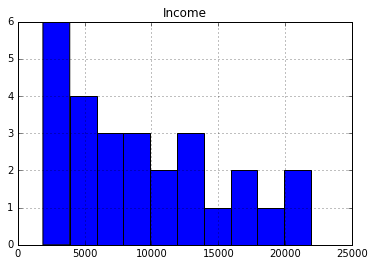

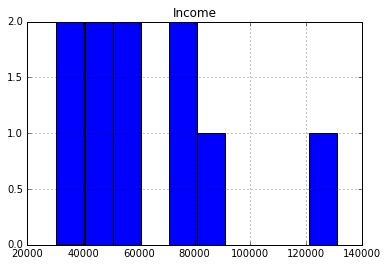

In [14]:
lowAsiaInc.hist()
topAsiaInc.hist()

In [15]:
print("mean population * number of countries for low income: %d\n"
      "mean population * number of countries for high income: %d" % (lowAsiaPop*len(lowAsiaInc), topAsiaPop*len(topAsiaInc)))

mean population * number of countries for low income: 3877843140
mean population * number of countries for high income: 189301927


> Asia has more counties below the average income than above it. Of these lower income countries, the majority is in the 1st quartile, meaning they are mostly poor countries. The average population of the countries below the mean income is a whole order of magnitude greater than the higher income countries.

>The mean income of Asia is skewed by The higher income countries, most of which are twice as much as the highest income in the lower income countries, while the rest are 4 to 6 times as great. This skewing effect dissappears when we consider the population to give the incomes weight.